In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import seaborn as sns
%matplotlib inline

In [60]:
df = pd.read_csv('ds_salaries.csv', index_col=0)

In [61]:
display(df.head())
df.info()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [62]:
# define value_count function:

def vc(df, col, r = False):
    """
    First create new_df with index = col given, column count after grouping by col and finally another column
    that is percentage
    
    if r == False (default): prints 1 sentence and shows new_df
    otherwise returns new_df
    
    """
    new_df = df.reset_index().groupby([col]).size().to_frame('count')
    new_df['percentage'] = new_df['count'].div(sum(df['count'])).mul(100)
    new_df = new_df.sort_values(by=['percentage'], ascending=False)
    
    if r:
        return new_df
    else:
        print(f'Value counts of columns {column} is')
        display(new_df)

# EDA

# Duplications

In [63]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606    False
Length: 607, dtype: bool

In [66]:
df[df.duplicated()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
217,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
256,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
331,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
332,2022,SE,FT,Data Analyst,112900,USD,112900,US,100,US,M
333,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
353,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
362,2022,SE,FT,Data Analyst,130000,USD,130000,CA,100,CA,M
363,2022,SE,FT,Data Analyst,61300,USD,61300,CA,100,CA,M
370,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
374,2022,MI,FT,ETL Developer,50000,EUR,54957,GR,0,GR,M


In [67]:
num_dup = len(df[df.duplicated()])
print(f"There are {num_dup} duplicated rows")
df = df.drop_duplicates()
print(f"After dropping duplicates, shape of df is {df.shape}")
display(df.head())

There are 42 duplicated rows
After dropping duplicates, shape of df is (565, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [91]:
df['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

# Change names to more meaningful words

In [72]:
df['employment_type'].value_counts()

FT    546
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [73]:
df = df.replace({'EN': 'Entry level', 'SE': 'Senior level', 'EX':'Expert', 'MI':'Mid level',
           'PT': 'Part-time', 'FT':'Full-time', 'CT':'Contract', 'FL':'Freelance'})

# Choose a style for pyplot

In [74]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [134]:
plt.style.use('classic')

# Draw pies

We will draw only columns with few unique values, inluding work_year, experience_level, employment_type, company_size

In [150]:
def pie(df, columns):
    """
    columns is a list of columns
    return: pies corresponding to columns
    """
    fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(15,13))
    #fig = plt.gcf()
    #fig.set_size_inches(15,13)
    fig.suptitle('Donut ist lecker',fontsize=15,fontweight='bold')
    
    ind = 0
    for i in range(2):
        for j in range(2):
            target = columns[ind]             # draw this column
            labels = df[target].value_counts().index.tolist()   # the unique values in this col
            data = df[target].value_counts().values.tolist() # the frequencies of values
            
            #sizes = np.rint(df[target].value_counts().values/ df[target].value_counts().values.sum() *100) 
                    # write the above list in percentage form
                
            explode = tuple(np.zeros(len(labels))+0.1) # a tuple of values 0.1, length = # unique values
            
            axes[i,j].pie(data, labels = labels, autopct='%1.1f%%', radius = 2, shadow = True)
            axes[i,j].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            axes[i,j].set_title(target,fontsize=15, fontweight='bold', pad = 0.1)
            
            
            centre_circle = Circle((0,0), 1, fc='white')
            axes[i,j].add_patch(centre_circle)
            
            #plt.tight_layout()
            ind+=1
            
            
    return plt.show()
            

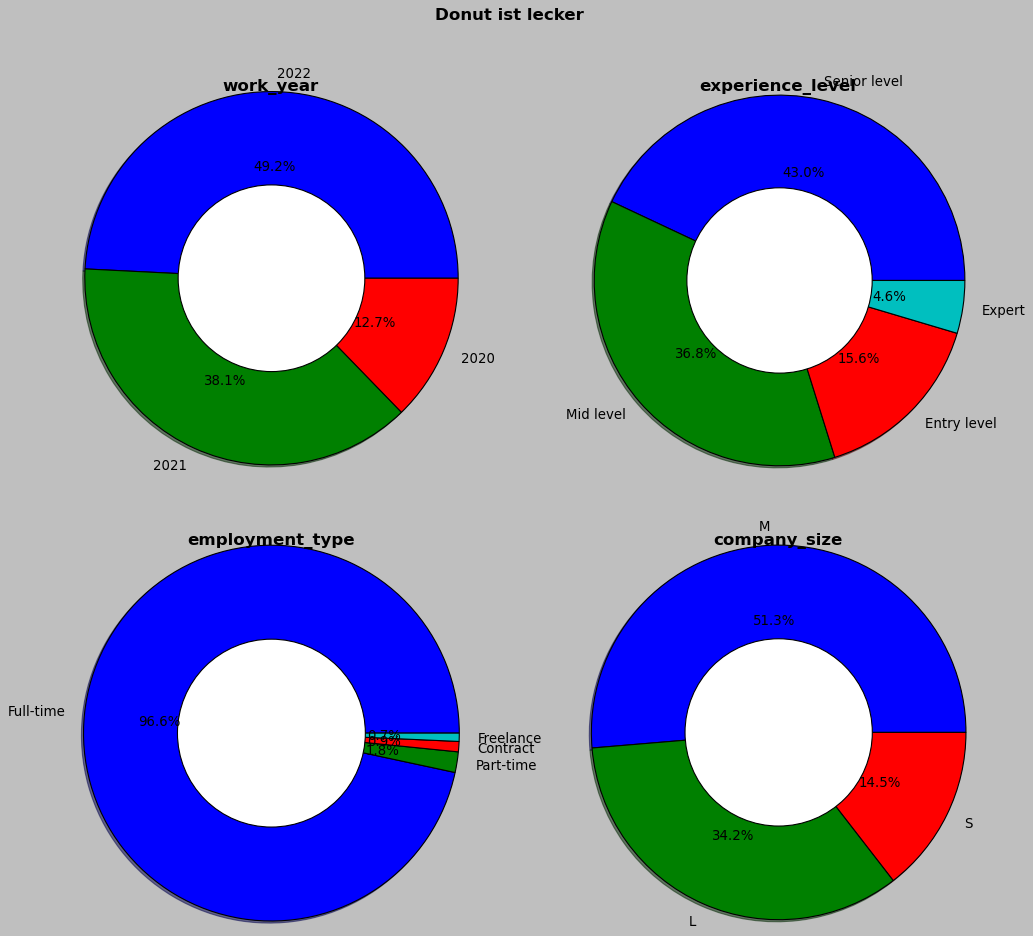

In [151]:
pie(df, ['work_year', 'experience_level','employment_type','company_size'])

In [18]:
df['experience_level'].value_counts()

SE    243
MI    208
EN     88
EX     26
Name: experience_level, dtype: int64

In [21]:
df['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [22]:
df = df.replace({'SE': 'Senior Level', 'MI': 'Mid Level', 'EN':'Entry Level', 'EX': 'Expert', 'FT': 'Full time',
                 'CT': 'Contract', 'PT': 'Part time', 'FL': 'Freelance'})

In [23]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid Level,Full time,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,Senior Level,Full time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,Senior Level,Full time,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,Mid Level,Full time,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,Senior Level,Full time,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Plot donut charts

In [24]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']